# 1) Data exploration

In [38]:
import pandas as pd
import numpy as np

In [39]:
train_data = pd.read_csv('../Data/train.csv', sep = ",")
test_data = pd.read_csv('../Data/test.csv', sep = ",")
print(train_data.head())
print('---------------')
print('TRAIN SET')
print('---------------')
print(train_data.isnull().sum())
print('---------------')
print('TEST SET')
print('---------------')
print(test_data.isnull().sum())
print('---------------')
print(train_data.describe())
print('---------------')
print(train_data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

C:\Users\simon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [40]:
# Survived by sex
Survived = train_data.groupby('Sex').sum()
Total = train_data.groupby('Sex').size()
print(Survived)
print(Total)
print(round(Survived['Survived']/Total, 2))

        PassengerId  Survived  Pclass       Age  SibSp  Parch        Fare
Sex                                                                      
female       135343       233     678   7286.00    218    204  13966.6628
male         262043       109    1379  13919.17    248    136  14727.2865
Sex
female    314
male      577
dtype: int64
Sex
female    0.74
male      0.19
dtype: float64


In [41]:
#Survived by class
Survived_class = train_data.groupby('Pclass').sum()
Total_class = train_data.groupby('Pclass').size()
print(Survived_class)
print(Total_class)
print(round(Survived_class['Survived']/Total_class,2))


        PassengerId  Survived      Age  SibSp  Parch        Fare
Pclass                                                          
1             99705       136  7111.42     90     77  18177.4125
2             82056        87  5168.83     74     70   3801.8417
3            215625       119  8924.92    302    193   6714.6951
Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    0.63
2    0.47
3    0.24
dtype: float64


In [42]:
# Survived by class of age
# Let's divide the people in classes of age: children (under 14), adolescent(14-20), adult(21-65), senior(65+)
def group_age(value):
    if value <= 14:
        return "Children"
    elif value <= 20:
        return "Adolescent"
    elif value <= 65:
        return "Adult"
    elif value <= 100:
        return "Senior"
    else:
        return "No data"
    
train_data['GroupAge'] = train_data['Age'].apply(group_age)

Survived_groupAge = train_data.groupby('GroupAge').sum()
Total_groupAge = train_data.groupby('GroupAge').size()
print(Survived_groupAge)
print(Total_groupAge)
print('----------')
print(round(Survived_groupAge['Survived']/Total_groupAge, 2))
print('----------')


            PassengerId  Survived  Pclass       Age  SibSp  Parch        Fare
GroupAge                                                                     
Adolescent        46117        37     258   1825.50     45     33   2885.2085
Adult            237589       207    1123  18368.00    179    171  19206.4994
Children          32938        45     202    439.17    141    103   2458.4917
No data           77098        52     460       NaN    100     32   3922.0663
Senior             3644         1      14    572.50      1      1    221.6834
GroupAge
Adolescent    102
Adult         527
Children       77
No data       177
Senior          8
dtype: int64
----------
GroupAge
Adolescent    0.36
Adult         0.39
Children      0.58
No data       0.29
Senior        0.12
dtype: float64
----------


In [43]:
print(train_data.groupby(['Pclass', 'GroupAge']).sum())

                   PassengerId  Survived      Age  SibSp  Parch        Fare
Pclass GroupAge                                                            
1      Adolescent         8219        13   281.00     11     13   1813.9125
       Adult             73821       104  6506.50     68     52  13736.8251
       Children           2289         4    31.92      4     10    624.9583
       No data           13408        14      NaN      6      1   1816.5582
       Senior             1968         1   292.00      1      1    185.1584
2      Adolescent         6476         7   288.00      2      4    327.2500
       Adult             62047        57  4658.50     57     42   2828.1750
       Children           8128        19    86.33     15     24    538.1542
       No data            4698         4      NaN      0      0     87.2625
       Senior              707         0   136.00      0      0     21.0000
3      Adolescent        31422        17  1256.50     32     16    744.0460
       Adult

In [44]:
number_of_ticket = train_data['Ticket'].drop_duplicates().tolist()
print(len(number_of_ticket))
print(len(train_data['Ticket']))
# there are some duplicate tickets, why?

681
891


# 2) Data visualization

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from bokeh.charts import Bar, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

Sex
female    314
male      577
dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


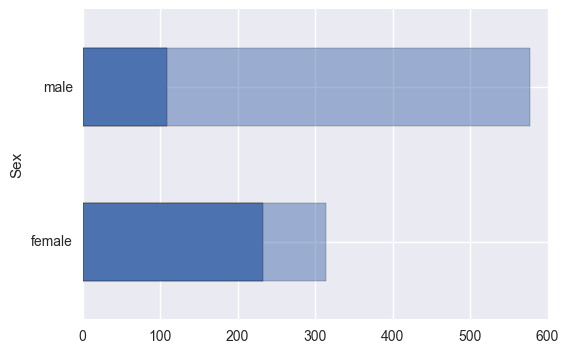

In [47]:
print(train_data.groupby('Sex').size())
print(train_data.groupby('Sex')['Survived'].sum())

train_data.groupby('Sex')['Survived'].sum().plot(kind='barh')
train_data.groupby('Sex').size().plot(kind='barh', alpha=0.5)

plt.show()


Being a female help out

Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


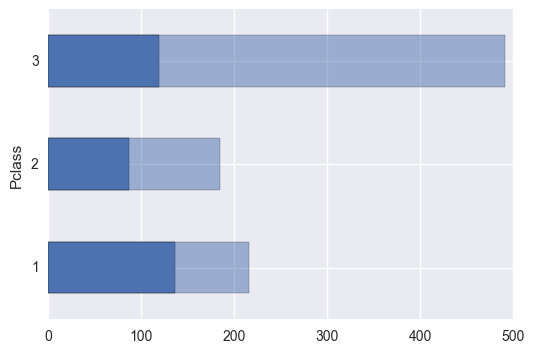

In [48]:
# Visualization per Pclass
print(train_data.groupby('Pclass').size())
print(train_data.groupby('Pclass')['Survived'].sum())

train_data.groupby('Pclass')['Survived'].sum().plot(kind='barh')
train_data.groupby('Pclass').size().plot(kind='barh', alpha=0.5)
plt.show()


being in the first class increase by a lot the chances of surviving, let's dive in to see the percentage of female and male in their respective class

GroupAge
Adolescent     37
Adult         207
Children       45
No data        52
Senior          1
Name: Survived, dtype: int64
GroupAge
Adolescent    102
Adult         527
Children       77
No data       177
Senior          8
dtype: int64


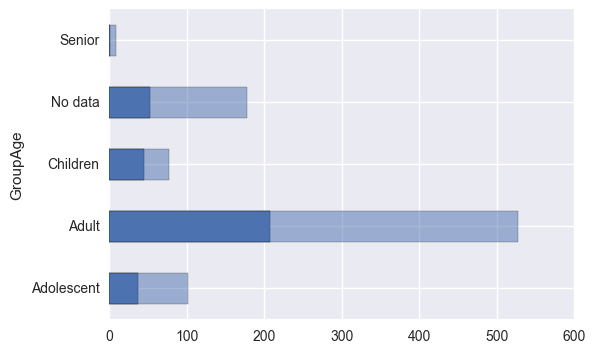

In [49]:
# Visualization per age group

print(train_data.groupby('GroupAge')['Survived'].sum())
print(train_data.groupby('GroupAge').size())

train_data.groupby('GroupAge')['Survived'].sum().plot(kind='barh')
train_data.groupby('GroupAge').size().plot(kind='barh', alpha=0.5)

plt.show()

In [50]:
print(train_data.groupby(['Pclass', 'Sex'])['Survived'].mean())

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


As you can see you really wanted to be in the first class cabin and female, however also being in the third class cabin and female won't be bad as you would have 50% chance of surviving

# 3) Feature Engineering

I'll combine the 'SibSp' and 'Parch' datapoints into a 'Family' indicator. The goal here would be to identify if having a family on board made you more or less likely to survive.

In [51]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
test_data['Family'] =  test_data['SibSp'] + test_data['Parch']

# Now that we have the family column let's make it a dummy variable whether a person was alone or with a family, logically
# being with your family should increase your chances of surviving at the sinking because of a common sense of taking care

train_data.loc[train_data['Family'] >= 1, 'Family'] = 1
test_data.loc[test_data['Family'] >= 1, 'Family'] = 1

Family
0    163
1    179
Name: Survived, dtype: int64
Family
0    537
1    354
dtype: int64
Family
0    0.30
1    0.51
dtype: float64


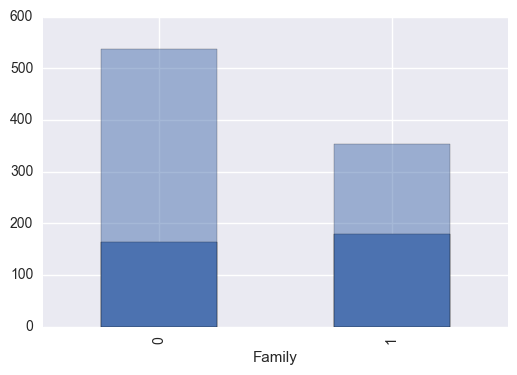

In [52]:
# let's test the hypothesis that being with the family would increase your chance of surviving
train_data.groupby('Family')['Survived'].sum().plot(kind='bar')
train_data.groupby('Family').size().plot(kind='bar', alpha=0.5)

survived = train_data.groupby('Family')['Survived'].sum()
total = train_data.groupby('Family').size()
print(train_data.groupby('Family')['Survived'].sum())
print(train_data.groupby('Family').size())
print(round(survived/total, 2))

As we can see 50% of the persons having a family survived, let's dive in and see how many males with a family survived

In [53]:
round(train_data.groupby(['Family', 'Sex'])['Survived'].mean(), 2)

Family  Sex   
0       female    0.79
        male      0.16
1       female    0.71
        male      0.27
Name: Survived, dtype: float64

27% of males with a family survived against the 16% of the males without a family survived

In [54]:
# Make sex a dummy variable, male=0 and female=1
train_data.loc[train_data['Sex'] == 'male', 'Sex'] = 0
train_data.loc[train_data['Sex'] == 'female', 'Sex'] = 1
test_data.loc[test_data['Sex'] == 'male', 'Sex'] = 0
test_data.loc[test_data['Sex'] == 'female', 'Sex'] = 1

Now I have to fill the NA data. The age data will be filled with the median, even though a deeper analysis could lead to a better fill in

In [55]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
print(train_data.isnull().sum())
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
print('--------')
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
GroupAge         0
Family           0
dtype: int64
--------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
dtype: int64


In [87]:
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# 4) Machine learning

In [105]:
# Load the library
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [106]:
# Feature
X = train_data.loc[:, ('Pclass', 'Age', 'Sex', 'Family', 'SibSp', 'Parch', 'Fare')]
# Label
y = train_data.loc[:, 'Survived']
#X.isnull().sum()
#X['Sex'] = X['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

In [107]:
# creation of the logistic function
logistic = linear_model.LogisticRegression()
logistic.fit(X, y)
Z = logistic.predict(X)
print(logistic.score(X, y))
print('-----------')

tree = tree.DecisionTreeClassifier(min_samples_split=10)
tree = tree.fit(X, y)
y_tree = tree.predict(X)
print(tree.score(X, y))
print('-----------')

forest = RandomForestClassifier(n_estimators=50, max_depth=9, 
        min_samples_split=7, min_samples_leaf=2)

scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.802469135802
-----------
0.921436588103
-----------
[ 0.75555556  0.8         0.75280899  0.93258427  0.87640449  0.84269663
  0.84269663  0.78651685  0.84269663  0.85227273]
0.828423277721


In [109]:
X_test = test_data.loc[:, ('Pclass', 'Age', 'Sex', 'Family', 'SibSp', 'Parch', 'Fare')]
forest.fit(X, y)
pred = forest.predict(X_test)

In [112]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": pred
    })
submission.to_csv('ForestSub.csv', index=False)

In [113]:
submission.shape

(418, 2)